In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



<BarContainer object of 10 artists>

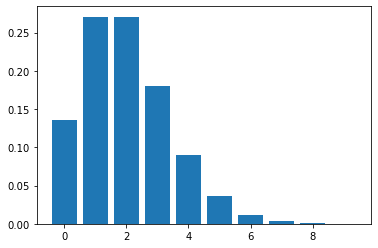

In [5]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson 
# distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability 
# of cars waiting at the drive-up window.

x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)

plt.bar(x,y)



In [6]:
# What is the probability that no cars drive up in the noon hour?
n_trials = nrows = 10000

choice_range = np.arange(0,16)
prob = stats.poisson(2).pmf(choice_range)


cars = np.random.choice(choice_range, size = (n_trials), p = prob)

print(f"The experimental probability of 0 cars is {(cars == 0).mean()}")

print(f"The statistical probability of 0 cars is {stats.poisson(2).pmf(0)}")



The experimental probability of 0 cars is 0.1398
The statistical probability of 0 cars is 0.1353352832366127


In [136]:
# What is the probability that 3 or more cars come through the drive through?
print(f"The experimental probability of 3 or more cars is {(cars >= 3).mean()}")

print(f"The statistical probability of 3 or more cars is {stats.poisson(2).sf(2)}\n")


# How likely is it that the drive through gets at least 1 car?

print(f"The experimental probability of at least 1 car is {(cars >= 1).mean()}")

print(f"The statistical probability of at least 1 car is {stats.poisson(2).sf(0)}")


The experimental probability of 3 or more cars is 0.3217
The statistical probability of 3 or more cars is 0.32332358381693654

The experimental probability of at least 1 car is 0.8602
The statistical probability of at least 1 car is 0.8646647167633873


In [190]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:
n_trials = 10000


grades = np.random.normal(3, .3, n_trials)

# What grade point average is required to be in the top 5% of the graduating class?
print(f"The experimental probability shows a gpa of {np.sort(grades)[9500]} or higher to be in the top 5% of the class.")

print(f"The statistical probability shows a gpa of {stats.norm(3, .3).ppf(.95)} or higher to be in the top 5% of the class.\n")


# What GPA constitutes the bottom 15% of the class?
print(f"The experimental probability shows a gpa of {np.sort(grades)[1500]} or lower to be in the bottom 15% of the class.")

print(f"The statistical probability shows a gpa of {stats.norm(3, .3).ppf(.15)} or lower to be in the bottom 15% of the class.\n")

# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
print(f"The range for the third decile is {stats.norm(3, .3).ppf(.2)} to {stats.norm(3, .3).ppf(.3)}.\nSo yes, a student with a 2.8 gpa would qualify for the scholarship.\n")


# If I have a GPA of 3.5, what percentile am I in?
print(f"The experimental probability shows a gpa of 3.5 being in the {(grades < 3.5).mean().round(2)*100} percentile of the class.")

print(f"The statistical probability shows a gpa of 3.5 being in the {(stats.norm(3, .3).cdf(3.5)).round(2) * 100} percentile of the class.")


The experimental probability shows a gpa of 3.49501477518576 or higher to be in the top 5% of the class.
The statistical probability shows a gpa of 3.4934560880854417 or higher to be in the top 5% of the class.

The experimental probability shows a gpa of 2.6914400528106452 or lower to be in the bottom 15% of the class.
The statistical probability shows a gpa of 2.689069983151863 or lower to be in the bottom 15% of the class.

The range for the third decile is 2.7475136299281258 to 2.842679846187588.
So yes, a student with a 2.8 gpa would qualify for the scholarship.

The experimental probability shows a gpa of 3.5 being in the 95.0 percentile of the class.
The statistical probability shows a gpa of 3.5 being in the 95.0 percentile of the class.


In [318]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?

expected_clicks= 4326 *.02
actual_clicks = 97
n_trials = 10000

choice_range = np.arange(0,150)
prob = stats.poisson(expected_clicks).pmf(choice_range)
clicks = np.random.choice(choice_range, size = (n_trials), p = prob)


print(f"The experimental probability that this many people or more click through is {(clicks >= actual_clicks).mean()}.")

print(f"The statistical probability that this many people or more click through is {stats.poisson(expected_clicks).sf(actual_clicks-1)}.")




The experimental probability that this many people or more click through is 0.1442.
The statistical probability that this many people or more click through is 0.14211867659283192.


In [94]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer 
# to each question.

# What is the probability that at least one of your first 60 answers is correct?
n_trials = 10000
n_questions = 60

responses = np.random.choice([True, False], p = (.01, .99), size = (n_trials, n_questions))
# (responses.sum(axis=1) >= 1).mean()

print(f"The experimental probability of getting one right answer in the first 60 is {(responses.sum(axis=1) >= 1).mean()}.")

print(f"The statistical probability of getting one right answer in the first 60 is {stats.binom(60, .01).sf(0)}.")


The experimental probability of getting one right answer in the first 60 is 0.4515.
The statistical probability of getting one right answer in the first 60 is 0.45284335760923855.


In [330]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 
# 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 
# 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day?
n_trials = 10000
visitors = (.9 *66)
visitors = np.round(visitors)
visitors = int(visitors)

cleans = np.random.choice([True, False], p = (.03, .97), size = (n_trials, visitors))



print(f"The experimental probability of the break area being cleaned each day is {(cleans.sum(axis=1) > 0).mean()}.")

print(f"The statistical probability of the break area being cleaned each day is {stats.binom(visitors, .03).sf(0)}.\n")


# How likely is it that it goes two days without getting cleaned up? 
cleans_after2 = np.random.choice([True, False], p = (.03, .97), size = (n_trials, visitors*2))


print(f"The experimental probability of the break area not being cleaned after 2 days is {(cleans_after2.sum(axis=1) < 1).mean()}.")

print(f"The statistical probability of the break area not being cleaned after 2 days is {stats.binom(visitors*2, .03).cdf(0)}.\n")

# All week?
cleans_after_week = np.random.choice([True, False], p = (.03, .97), size = (n_trials, visitors*5))


print(f"The experimental probability of the break area not being cleaned all week is {(cleans_after_week.sum(axis=1) < 1).mean()}.")

print(f"The statistical probability of the break area not being cleaned all week is {stats.binom(visitors*5, .03).cdf(0)}.")          


The experimental probability of the break area being cleaned each day is 0.8338.
The statistical probability of the break area being cleaned each day is 0.8342199288437352.

The experimental probability of the break area not being cleaned after 2 days is 0.027.
The statistical probability of the break area not being cleaned after 2 days is 0.02748303199257622.

The experimental probability of the break area not being cleaned all week is 0.0002.
The statistical probability of the break area not being cleaned all week is 0.00012521651388091353.


In [338]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several 
# weeks of careful observation, you notice that the average number of people in line when your lunch break starts is 
# normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, 
# and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to 
# eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to 
# and from La Panaderia.

mean_time = 30
sd_time = 6
time_needed = 60 - 15 - 10 - 2
n_trials = 10000
wait_times = np.random.normal(mean_time, sd_time, size= n_trials)


print(f"The experimental probability of having enough time to eat food is {(wait_times < time_needed).mean()}.")

print(f"The statistical probability of having enough time to eat food is {stats.norm(mean_time, sd_time).cdf(time_needed)}.")          



The experimental probability of having enough time to eat food is 0.6919.
The statistical probability of having enough time to eat food is 0.6914624612740131.


In [344]:
# 7. Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. For the following questions, calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.

import env
import pandas as pd
url = env.get_db_url('employees')

query = '''
SELECT salary
FROM salaries
WHERE to_date > now();
'''

salaries = pd.read_sql(query, url)

In [296]:
mean_sal = salaries.mean()[0]
sd_sal = salaries.std()[0]
print(f"The mean salary is ${mean_sal.round(2)} and the standard deviation is ${sd_sal.round(2)}")

The mean salary is $72012.24 and the standard deviation is $17310.0


In [320]:
n_trials = 10000
exp_sal = np.random.normal(mean_sal, sd_sal, size = n_trials) 


# What percent of employees earn less than 60,000?
print(f"The experimental percentage of employees who earn less than $60,000 is {(exp_sal < 60000).mean()*100}%.")

print(f"The statistical percentage of employees who earn less than $60,000 is {(stats.norm(mean_sal, sd_sal).cdf(60000)*100).round(2)}%.")          

print(f"The actual percentage of employees who earn less than $60,000 is {(((salaries < 60000).mean()*100)[0]).round(2)}%.\n")

# What percent of employees earn more than 95,000?
print(f"The experimental percentage of employees who earn more than $95,000 is {(exp_sal > 95000).mean()*100}%.")

print(f"The statistical percentage of employees who earn more than $95,000 is {(stats.norm(mean_sal, sd_sal).sf(95000)*100).round(2)}%.")          

print(f"The actual percentage of employees who earn less more $95,000 is {(((salaries > 95000).mean()*100)[0]).round(2)}%.\n")




# What percent of employees earn between 65,000 and 80,000?
print(f"The experimental percentage of employees who earn between $65,000 and $80,000 is {((exp_sal > 65000) & (exp_sal < 80000)).mean()*100}%.")

print(f"The statistical percentage of employees who earn between $65,000 and $80,000 is {((stats.norm(mean_sal, sd_sal).cdf(80000) - stats.norm(mean_sal, sd_sal).cdf(65000)) *100).round(2)}%.")          

print(f"The actual percentage of employees who earn between $65,000 and $80,000 is {((((salaries > 65000) & (salaries < 80000)).mean()*100)[0]).round(2)}%.\n")



# What do the top 5% of employees make?
print(f"The experimental salary of employees who are in the top 5% is a minimum of ${(pd.DataFrame(exp_sal).quantile(.95)[0]).round(2)}.")

print(f"The statistical salary of employees who are in the top 5% is a minimum of ${(stats.norm(mean_sal, sd_sal).ppf(.95)).round(2)}.")          

print(f"The actual salary of employees who are in the top 5% is a minimum of ${(salaries.quantile(.95)[0]).round(2)}.")



The experimental percentage of employees who earn less than $60,000 is 24.349999999999998%.
The statistical percentage of employees who earn less than $60,000 is 24.39%.
The actual percentage of employees who earn less than $60,000 is 27.06%.

The experimental percentage of employees who earn more than $95,000 is 9.28%.
The statistical percentage of employees who earn more than $95,000 is 9.21%.
The actual percentage of employees who earn less more $95,000 is 10.86%.

The experimental percentage of employees who earn between $65,000 and $80,000 is 33.14%.
The statistical percentage of employees who earn between $65,000 and $80,000 is 33.51%.
The actual percentage of employees who earn between $65,000 and $80,000 is 32.51%.

The experimental salary of employees who are in the top 5% is a minimum of $101314.03.
The statistical salary of employees who are in the top 5% is a minimum of $100484.64.
The actual salary of employees who are in the top 5% is a minimum of $104225.85.
